In [1]:
from pyspark import SparkContext, SparkConf
import initspark

In [2]:
conf = SparkConf().setAppName("AirportsVisual").setMaster("local")
sc = SparkContext(conf=conf)

In [3]:
rdd = sc\
    .textFile("data/airports/airports-semicolon.csv")\
    .map(lambda x: x.split(";"))\
    .cache()

In [5]:
data = rdd\
    .map(lambda x: (x[8], 1))\
    .reduceByKey(lambda x, y: x + y)\
    .map(lambda x: (x[1], x[0]))\
    .sortByKey(ascending = False)\
    .collect()

In [19]:
countries = []
numberOfAirports = []

otherCounter = 0

counter = 0
for row in data:
    counter = counter + 1
    
    if counter < 10:
        countries.append(row[1])
        numberOfAirports.append(row[0])
    else: 
        otherCounter = otherCounter + row[0]

countries.append("Sonstige")
numberOfAirports.append(otherCounter)

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

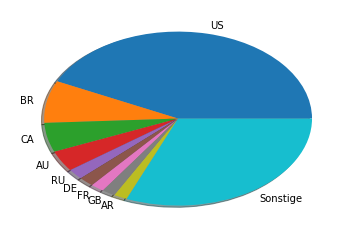

In [21]:
plt.pie(numberOfAirports, labels = countries, shadow = True)
plt.show()